# Machine Learning CA1

1) A clear introduction, motivation, a description of the problem domain, and an explanation of
how the assignment's goals are justified using Prediction / Classification algorithms.

(20 marks)

2) Characterization of data, pre-processing, explanation and description of techniques used for
the variation in the accuracy across three training splits (10%, 15% and 25%) using cross
validation techniques.

(30 marks)

3) What is the primary purpose of hyperparameter tuning in machine learning? Could you
elaborate on specific hyperparameter tuning techniques (e.g., GridSearchCV) applied to
machine learning models to find optimal parameters?

(25 marks)

4) Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation,
provide a rationale for the chosen models and use visualisations to support your findings.
Comments in Python code, conclusions of the assignment should be specified at the end of
the report. Harvard Style must be used for citations and references.

(25 marks)

In [1]:
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import clear_output
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE


In [2]:
# Justice Centered data includes a set of justice votes for each dispute, along with the case information. The unit of analysis is the vote. These data should be used if the votes of the justices are of interest.
#fp='https://drive.google.com/uc?id=' + '1Fbtcb4gvAAxXmVegJSFrz9UTSDSu9jfK' # sep = ";"
fp="./dropout_dataset.csv" 
df = pd.read_csv(fp,sep=",",index_col=0)
#df.to_csv("./dropout_data.csv",index=False)

In [3]:
print(df.shape)
print(df.head())

(4424, 37)
   maritalstatus  applicationmode  applicationorder  course  \
0              1               17                 5     171   
1              1               15                 1    9254   
2              1                1                 5    9070   
3              1               17                 2    9773   
4              2               39                 1    8014   

   daytimeeveningattendance  previousqualification  \
0                         1                      1   
1                         1                      1   
2                         1                      1   
3                         1                      1   
4                         0                      1   

   previousqualificationgrade  nacionality  mothersqualification  \
0                       122.0            1                    19   
1                       160.0            1                     1   
2                       122.0            1                    37   
3            

In [4]:
print(df.columns)
# simplifying column names
df.columns = [''.join(ch.lower() for ch in column_name if ch.isalnum()) for column_name in df.columns]
print(df.columns)


Index(['maritalstatus', 'applicationmode', 'applicationorder', 'course',
       'daytimeeveningattendance', 'previousqualification',
       'previousqualificationgrade', 'nacionality', 'mothersqualification',
       'fathersqualification', 'mothersoccupation', 'fathersoccupation',
       'admissiongrade', 'displaced', 'educationalspecialneeds', 'debtor',
       'tuitionfeesuptodate', 'gender', 'scholarshipholder', 'ageatenrollment',
       'international', 'curricularunits1stsemcredited',
       'curricularunits1stsemenrolled', 'curricularunits1stsemevaluations',
       'curricularunits1stsemapproved', 'curricularunits1stsemgrade',
       'curricularunits1stsemwithoutevaluations',
       'curricularunits2ndsemcredited', 'curricularunits2ndsemenrolled',
       'curricularunits2ndsemevaluations', 'curricularunits2ndsemapproved',
       'curricularunits2ndsemgrade', 'curricularunits2ndsemwithoutevaluations',
       'unemploymentrate', 'inflationrate', 'gdp', 'target'],
      dtype='object

In [5]:
df.head()

,maritalstatus,applicationmode,applicationorder,course,daytimeeveningattendance,previousqualification,previousqualificationgrade,nacionality,mothersqualification,fathersqualification,...,curricularunits2ndsemcredited,curricularunits2ndsemenrolled,curricularunits2ndsemevaluations,curricularunits2ndsemapproved,curricularunits2ndsemgrade,curricularunits2ndsemwithoutevaluations,unemploymentrate,inflationrate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
for col in df.select_dtypes(include=[object]).columns:
    print(df[col].value_counts())

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [7]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    #input("\n")
    clear_output()

In [8]:
categorical_variables = [
 'maritalstatus',
 'applicationmode',
 'applicationorder',
 'course',
 # 'daytimeeveningattendance', boolean
 'previousqualification',
 # 'previousqualificationgrade', numeric
 'nacionality',
 'mothersqualification',
 'fathersqualification',
 'mothersoccupation',
 'fathersoccupation',
 # 'admissiongrade', numeric
 # 'displaced', boolean
 #'educationalspecialneeds', boolean
 #'debtor', boolean
 #'tuitionfeesuptodate', boolean
 #'gender', boolean
 #'scholarshipholder', boolean
 #'ageatenrollment', numeric
 #'international', boolean
 #'curricularunits1stsemcredited', numeric
 #'curricularunits1stsemenrolled', numeric
 #'curricularunits1stsemevaluations', numeric
 #'curricularunits1stsemapproved', numeric
 #'curricularunits1stsemgrade', numeric
 #'curricularunits1stsemwithoutevaluations', numeric
 #'curricularunits2ndsemcredited',
 #'curricularunits2ndsemenrolled',
 #'curricularunits2ndsemevaluations',
 #'curricularunits2ndsemapproved',
 #'curricularunits2ndsemgrade',
 #'curricularunits2ndsemwithoutevaluations',
 #'unemploymentrate', numeric
 #'inflationrate', numeric
 #'gdp', numeric
 #'target'
]

numerical_variables = [
'daytimeeveningattendance', # boolean
'previousqualificationgrade', # numeric
'admissiongrade', # numeric
'displaced', # boolean
'educationalspecialneeds', # boolean
'debtor', # boolean
'tuitionfeesuptodate', # boolean
'gender', # boolean
'scholarshipholder', # boolean
'ageatenrollment', # numeric
'international', # boolean
'curricularunits1stsemcredited', # numeric
'curricularunits1stsemenrolled', # numeric
'curricularunits1stsemevaluations', # numeric
'curricularunits1stsemapproved', # numeric
'curricularunits1stsemgrade', # numeric
'curricularunits1stsemwithoutevaluations', # numeric
'curricularunits2ndsemcredited', # numeric
'curricularunits2ndsemenrolled', # numeric
'curricularunits2ndsemevaluations', # numeric
'curricularunits2ndsemapproved', # numeric
'curricularunits2ndsemgrade', # numeric
'curricularunits2ndsemwithoutevaluations', # numeric
'unemploymentrate', # numeric
'inflationrate', # numeric
'gdp', # numeric
]



for col in categorical_variables:
    df[col] = df[col].astype('category')
    

## Characterization of data


In [9]:
# Show count of each class in the target variable
class_counts = df['target'].value_counts()
print("Count of each class in 'target' (drop out status):")
print(100*class_counts/len(df['target']))

Count of each class in 'target' (drop out status):
target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: count, dtype: float64


## Preprocessing data for Machine Learning


### Splitting data and converting columns to numerical values (features)
1. Splitting features and label
    1. Enconding labels to label (binary classification)
3. dummies variables for  categorical columns
4. Train test split
5. standardize scaler for numerical columns
6. Fit PCA

#### Splitting features and label
    1. drop the target column from the features dataframe, 
    2. Enconding labels to label with the map function (binary classification)

In [10]:
# splitting X(Features) and y(label/target)
df_X = df.drop('target',axis=1)
# Putting response variable to y
df_y = df['target'].map({'Graduate':0,'Enrolled':0,'Dropout':1})

#### Creating dummy variables from the training data and applying to the test data
    - Using get dummies or one hot encoder

In [11]:
# Simplified approach for categorical
df_X_with_dummies = pd.get_dummies(df_X, columns=categorical_variables, drop_first = True)
#ohe= OneHotEncoder(handle_unknown='ignore')
#ohe.fit(df_train[categorical_variables])
#X_ohe_train = ohe.transform(df_train[categorical_variables])
#X_ohe_test = ohe.transform(df_test[categorical_variables])
#X_categorical_train = pd.DataFrame(X_categorical_train.toarray(),columns=ohe.get_feature_names_out())
#X_categorical_test= pd.DataFrame(X_categorical_test.toarray(),columns=ohe.get_feature_names_out())

####  Train test split

In [12]:
# try different test sizes 10, 15, 25
test_size = 0.15
# 101 previously
# 595 previously 2
# 219830
X_train, X_test, y_train, y_test = train_test_split(df_X_with_dummies, df_y, test_size=test_size, shuffle=True, random_state=782148712)

#### Standardize scaler for numerical columns

In [13]:
# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


#### Fit PCA

In [14]:
# I fit PCA on the training data and use it to transform both the training data and the test data
# PCA not quite working
# 5  dimensions explaining 21%
# 10 dimensions  32%
# 20 dimensions 50%


# keep the first two principal components of the data
pca = PCA(n_components = 100)
# transform data into the first two principal components
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_train_scaled_pca = pd.DataFrame(X_train_scaled_pca)
X_test_scaled_pca = pca.transform(X_test_scaled)
X_test_scaled_pca = pd.DataFrame(X_test_scaled_pca)
df_train_scaled_pca = X_train_scaled_pca.copy()
df_train_scaled_pca["y"] = y_train
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_train_scaled_pca.shape)))

Original shape: (3760, 244)
Reduced shape: (3760, 100)


In [15]:
df_train_scaled_pca.columns = [str(c) for c in df_train_scaled_pca.columns]

In [16]:
explained_variances = pca.explained_variance_
acc_explained_variances = [sum(explained_variances[:i]) for i in range(5)]

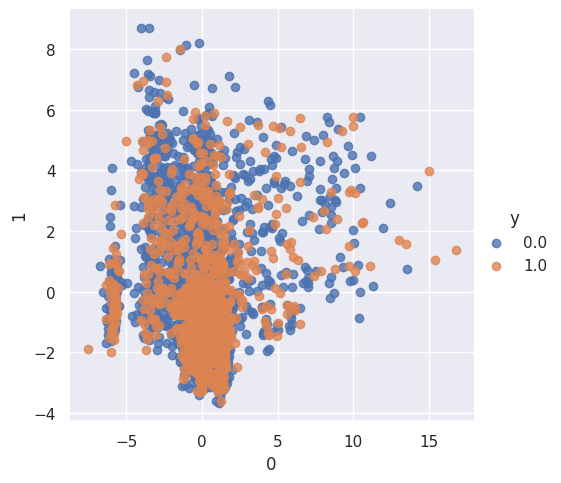

In [17]:
sns.set()
# Plot 2D PCA Graph
# The lower dimensions of PCA can't separate dropout from not-dropout
sns.lmplot(
    x=df_train_scaled_pca.columns[0], 
    y=df_train_scaled_pca.columns[1], 
    data=df_train_scaled_pca, 
    hue='y', 
    fit_reg=False, 
    legend=True
    )


#### SMOTE train data

In [18]:
# The smote method just adds more examples to minority classes, balancing all target classes
# so it does not change the features columns
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=1241241)#42)
X_SMOTE_train_scaled, y_SMOTE_train = smote.fit_resample(X_train_scaled, y_train)

## Training process

### Defining Models to be evaluted
    1. selecting a list of models
    2. Defining the parameters to evaluate different values
    3. Train all defined models across K-fold cross validation

In [19]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}
classifiers_full_data = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

In [20]:
# Define hyperparameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ['lbfgs', 'liblinear'],
        "penalty": ['l2']
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "k-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']     #The "algorithm" parameter in the KNeighborsClassifier controls how the nearest neighbors search is performed. It determines the method used to compute distances between points in the feature space and find the nearest neighbors. There are four options for the "algorithm"
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf'],
        "gamma": ['scale', 'auto']
    },
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50)],     # (50,) → A network with 1 hidden layer of 50 neurons. (100,) → A network with 1 hidden layer of 100 neurons. (50,) → A network with 1 hidden layer of 50 neurons (same as the first one).
        "activation": ['sigmoid', 'relu'],
        "solver": ['adam', 'sgd'],
        "learning_rate": ['constant', 'adaptive']       # 'constant': The learning rate remains fixed throughout training. It doesn’t change., 'adaptive': The learning rate starts at a given value and decreases over time if the model's performance plateaus (i.e., when the model is no longer improving after a set number of iterations).
    }
}

## Training Phase

### from the previous step :
- we have:
    -  X_train_scaled, X_test_scaled, which uses y_train
    -  X_train_scaled_pca, X_test_scaled_pca which uses y_train
    -  X_SMOTE_train_scaled, X_test_scaled which uses y_SMOTE_train
    -  the y_test is the same for everyone

### Choosing hyperparameters of each model group (best CV models)
- I select the best hyperparameters for each class of model with Grid Search Cross Validation
- The idea is to know with parameters works best across many scenarios ("folds")
- We select the parameters based on the best weighted average F1 score

In [21]:
features_grid = {
    "scaled": (X_train_scaled,  X_test_scaled, y_train),
    "scaled_pca": (X_train_scaled_pca, X_test_scaled_pca, y_train),
    "SMOTE_scaled": (X_SMOTE_train_scaled, X_test_scaled, y_SMOTE_train),
}

In [22]:
models_CV_results = {
}

In [23]:
n_cv = 3
for model_name, model in classifiers.items():
    parameters_options = param_grids[model_name]
    for features_option_name, features_option in features_grid.items():
        print(f"{model_name}_{features_option_name}")
        grid_search = GridSearchCV(estimator = model, param_grid = parameters_options, 
                          cv = n_cv, n_jobs = -1,verbose = 1, scoring="f1")
        selected_X_train, selected_X_test, selected_y_train = features_grid[features_option_name]
        grid_search.fit(selected_X_train, selected_y_train)
        # Best model from grid search
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_CV_score = grid_search.best_score_
        
        
        models_CV_results[f"{model_name}_{features_option_name}"] = {
            "model_name": model_name,
            "best_model": best_model,
            "best_params": best_params,
            "features_name": features_option_name,
            "best_cv_score": best_CV_score,
        }


Logistic Regression_scaled
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression_scaled_pca
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression_SMOTE_scaled
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Decision Tree_scaled
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Decision Tree_scaled_pca
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Decision Tree_SMOTE_scaled
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Random Forest_scaled
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest_scaled_pca
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest_SMOTE_scaled
Fitting 3 folds for each of 108 candidates, totalling 324 fits
k-Nearest Neighbors_scaled
Fitting 3 folds for each of 16 candidates, totalling 48 fits
k-Nearest Neighbors_scaled_pca
Fitting 3 folds for each of 16 candidates, totalling 48 fits
k-Nearest Neighbors_SMOTE_sc

/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/sit

Neural Network_scaled_pca
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/sit

Neural Network_SMOTE_scaled
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/berstearns/venv/lib/python3.12/sit

### Analysing hyperparameters results


In [24]:
# https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-by-one-column
# sorting results dataframe by CV score
# SMOTE features clearly yield better results on the training CV results
# the best Neural Network model is the best performing model with  the best RF and SVM being very close as well
cv_results=[]
for best_model_name, best_model_results in models_CV_results.items():
    #features_option_name = best_model_results["features_option_name"]
    #print(best_model_results)
    #cv_scores = cross_val_score(best_model, X, y, cv=n_cv, scoring='accuracy')
    cv_results.append([best_model_results["model_name"],best_model_results["best_params"],best_model_results["features_name"],best_model_results["best_cv_score"]])
    #cv_results.append([name, cv_scores.mean()])
    # Display cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=["model_name", "best_params", "features_name","best_cv_score"])
sorted_cv_results_df = cv_results_df.sort_values("best_cv_score", ascending=False)
print("\nCross-Validation training F-1 Scores after GridSearchCV:")
print(sorted_cv_results_df[["model_name", "features_name", "best_cv_score","best_params"]])


Cross-Validation training F-1 Scores after GridSearchCV:
                model_name features_name  best_cv_score  \
17          Neural Network  SMOTE_scaled       0.915188   
14  Support Vector Machine  SMOTE_scaled       0.894059   
8            Random Forest  SMOTE_scaled       0.893153   
2      Logistic Regression  SMOTE_scaled       0.864815   
5            Decision Tree  SMOTE_scaled       0.863535   
11     k-Nearest Neighbors  SMOTE_scaled       0.819386   
12  Support Vector Machine        scaled       0.786432   
6            Random Forest        scaled       0.781906   
0      Logistic Regression        scaled       0.779615   
15          Neural Network        scaled       0.772003   
1      Logistic Regression    scaled_pca       0.753517   
13  Support Vector Machine    scaled_pca       0.752772   
16          Neural Network    scaled_pca       0.749117   
3            Decision Tree        scaled       0.729627   
7            Random Forest    scaled_pca       0.716043  

### Retraining all best CV models with all training data

models_from_CV_in_fulldata_results = {}
for best_model_name, best_model_results in models_CV_results.items():
    model_name = best_model_results['model_name']
    model_hyperparameters = best_model_results['best_params']
    model_class = classifiers_full_data[model_name]
    model_class.set_params(**model_hyperparameters)
    features_option_name = best_model_results["features_name"]
    selected_X_train, selected_X_test, selected_y_train = features_grid[features_option_name]
    model_class.fit(selected_X_train, selected_y_train)
    models_from_CV_in_fulldata_results[best_model_name] ={
            "model_name": model_name,
            "best_model": model_class,
            "best_params": model_hyperparameters,
            "features_name": features_option_name,
    }

## Evaluation Phase

### Best Models test results

In [26]:
for best_model_name, best_model_results in models_CV_results.items():
    print(best_model_name)
    features_option_name = best_model_results["features_name"]
    selected_X_train, selected_X_test, selected_y_train = features_grid[features_option_name]
    best_model = best_model_results["best_model"]
    print(selected_X_test.shape)
    ###### TEST results
    # Predict on the test set with the best model
    y_test_pred = best_model.predict(selected_X_test)
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    test_confusion_matrix = confusion_matrix(y_test,y_test_pred)
    print(test_confusion_matrix)

    models_CV_results[best_model_name]["test_accuracy"] =  accuracy
    models_CV_results[best_model_name]["test_precision"] =  precision
    models_CV_results[best_model_name]["test_recall"] =  recall
    models_CV_results[best_model_name]["test_f1_score"] =  f1_score
    models_CV_results[best_model_name]["test_confusion_matrix"] =  test_confusion_matrix
    print(test_confusion_matrix)
    print(f"accuracy: {accuracy}\n precision: {precision}\n recall: {recall}\n f1-score: {f1_score}\n")
    print(report,"\n")
    clear_output()

In [33]:
# https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-by-one-column
# sorting results dataframe by CV score
# SMOTE features clearly yield better results on the training CV results
# the best Neural Network model is the best performing model with  the best RF and SVM being very close as well
cv_and_test_results=[]
for best_model_name, best_model_results in models_CV_results.items():
    column_values= [
        best_model_results["model_name"],
        best_model_results["features_name"],
        best_model_results["test_f1_score"],
        best_model_results["best_cv_score"],
        best_model_results["test_accuracy"],
        best_model_results["test_precision"],
        best_model_results["test_recall"],
        best_model_results["best_params"],
    ]
    cv_and_test_results.append(column_values)
columns = [
        "model_name", "features_name", "test_f1_score", "best_cv_score", 
        "test_accuracy", "test_precision", "test_recall", "best_params",
          ]

cv_and_test_results_df = pd.DataFrame(cv_and_test_results, columns=columns)
sorted_cv_results_df = cv_and_test_results_df.sort_values("test_f1_score", ascending=False)
print("\nTest F-1 Scores after selecting best models from GridSearchCV:")
print(sorted_cv_results_df[["model_name", "features_name", "test_f1_score", "best_cv_score", "best_params"]])


Test F-1 Scores after selecting best models from GridSearchCV:
                model_name features_name  test_f1_score  best_cv_score  \
0      Logistic Regression        scaled       0.886629       0.779615   
6            Random Forest        scaled       0.883781       0.781906   
12  Support Vector Machine        scaled       0.883122       0.786432   
8            Random Forest  SMOTE_scaled       0.881766       0.893153   
15          Neural Network        scaled       0.875552       0.772003   
2      Logistic Regression  SMOTE_scaled       0.871799       0.864815   
1      Logistic Regression    scaled_pca       0.870309       0.753517   
16          Neural Network    scaled_pca       0.869655       0.749117   
13  Support Vector Machine    scaled_pca       0.866953       0.752772   
3            Decision Tree        scaled       0.859314       0.729627   
7            Random Forest    scaled_pca       0.856913       0.716043   
14  Support Vector Machine  SMOTE_scaled       0

In [ ]:
print(y_train.value_counts()/len(y_train)
y_test.value_counts()/len(y_test)

## Interpreting and explaning results

### Overfitting/ underfitting / generalization

### References

1. https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-by-one-column
